In [81]:
import pandas as pd
from pandas.io.json import json_normalize  
import scienceplots
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

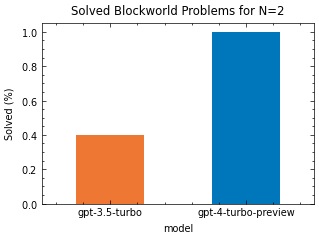

In [77]:
plt.style.use(['science', 'no-latex', 'nature'])
data_file = "data/exp2-2024-04-22-14_33_42.json"
with open(data_file, "r") as f:
    data = json.load(f)
# df = pd.DataFrame(data['results'])
# # convert each dict in the 'results' column to a separate column
# df_gpt3 = pd.DataFrame(df['gpt-3.5-turbo'].values.tolist(), index=df.index)
# df_gpt4 = pd.DataFrame(df['gpt-4-turbo-preview'].values.tolist(), index=df.index)
# # create multi-level column names for gpt3 and gpt4 and then concat
# df_gpt3.columns = pd.MultiIndex.from_product([['gpt-3.5-turbo']])
# df_gpt4.columns = pd.MultiIndex.from_product([['gpt-4-turbo-preview']])
# df = pd.concat([df_gpt3, df_gpt4], axis=1)
df =pd.DataFrame.from_dict(data['results'],orient='columns').stack().to_frame()
df = pd.DataFrame(df[0].values.tolist(), index=df.index).reset_index()
# df.rename_axis('model', inplace=True)
# group by model name
df.rename(columns={'level_1': 'model'}, inplace=True)
df = df.drop(columns=['level_0']).reset_index(drop=True)
df = df.groupby('model').sum()
df = df['solved']/5.0
df

# colors axes.prop_cycle : cycler('color', ['EE7733', '0077BB', '33BBEE', 'EE3377', 'CC3311', '009988', 'BBBBBB'])
colors = ['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']

df.plot(kind='bar', color=colors)
plt.ylabel('Solved (%)')
plt.xticks(rotation=0)
plt.title(f'Solved Blockworld Problems for N={data["meta"]}')
plt.tight_layout()



<AxesSubplot:xlabel='nblocks', ylabel='acc'>

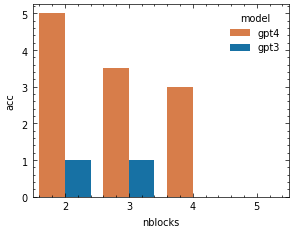

In [106]:
plt.style.use(['science', 'no-latex', 'nature'])
NBLOCKS=[i for i in range(4)]
results = {
    'gpt4': {2:5.0, 3:3.5, 4:3.0, 5:0.0},
    'gpt3': {2:2.0, 3:1.0, 4:0.0, 5:0.0},
}
df = pd.DataFrame(results)
df =df.stack().to_frame()
df.reset_index(inplace=True)
df.rename(columns={'level_1': 'model'}, inplace=True)
df.rename(columns={'level_0': 'nblocks'}, inplace=True)
df.rename(columns={df.columns.values[2]: 'acc'}, inplace=True)
df.head()
colors = ['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']
sns.barplot(data=df, x='nblocks', y='acc', hue='model', palette=colors)
